1) Import Libraries

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import csv

2) Load files

In [285]:
data = pd.read_csv("C:/Users/rened/Desktop/Titanic Bases/Credit/credit_data.csv")

3.1) Data Exploration

In [286]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


In [287]:
data.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [288]:
data.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


3.2) Data Visualization

array([[<AxesSubplot:title={'center':'clientid'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'loan'}>],
       [<AxesSubplot:title={'center':'default'}>, <AxesSubplot:>]],
      dtype=object)

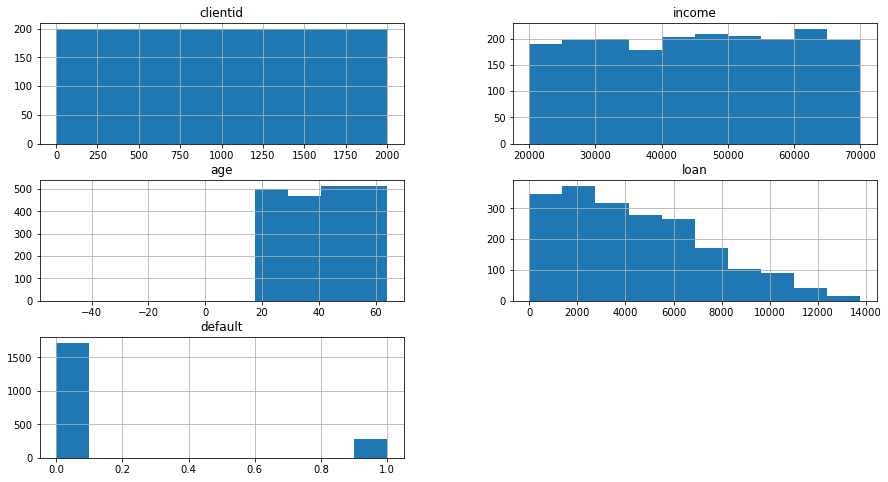

In [289]:
data.hist(figsize=(15,8))

4) Preprocessing

In [290]:
#Do we have age<18?
age_negative = data.loc[data['age']<18]
age_negative.head()

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [291]:
# cálculo da média da coluna 'idade' excluindo os valores menores que 18
age_average = data.loc[data['age'] >= 18, 'age'].mean()
print(age_average)

40.92770044906149


In [292]:
# substituição dos valores menores que 18 pela média da coluna 'idade'
data.loc[data['age'] < 18, 'age'] = age_average

In [293]:
data.iloc[[15, 21, 26], :]

,clientid,income,age,loan,default
15,16,50501.726689,40.9277,3977.287432,0
21,22,32197.620701,40.9277,4244.057136,0
26,27,63287.038908,40.9277,9595.286289,0


In [294]:
#Quais são os atributos com valores nulos?
data.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [295]:
linhas_nan = data.loc[data['age'].isnull()]
linhas_nan.head()

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [296]:
#Tratando valores faltantes
#Como são apenas 3 valores na coluna "age", pode-se apenas preencher pela média.
#media_age = data['age'].mean()
#media_age

In [297]:
data['age'].fillna(data['age'].mean(), inplace = True)

In [298]:
#linhas_nan.head()
data.loc[pd.isnull(data['age'])]

,clientid,income,age,loan,default


In [299]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       2000 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


In [300]:
#correlation in order
numeric_features = data.select_dtypes(include=[np.number])
#categorical_features = data.select_dtypes(include=[object])
correlation = numeric_features.corr()    
#numeric_features.columns #numeric variables
#categorical_features.columns #Categorical Variables
print(correlation['default'].sort_values(ascending = False),'\n')

default     1.000000
loan        0.377160
income      0.002284
clientid   -0.020145
age        -0.445138
Name: default, dtype: float64 



In [301]:
data.corr()

,clientid,income,age,loan,default
clientid,1.000000,0.039280,-0.030445,0.018931,-0.020145
income,0.039280,1.000000,-0.033207,0.441117,0.002284
age,-0.030445,-0.033207,1.000000,0.006679,-0.445138
loan,0.018931,0.441117,0.006679,1.000000,0.377160
default,-0.020145,0.002284,-0.445138,0.377160,1.000000


<AxesSubplot:>

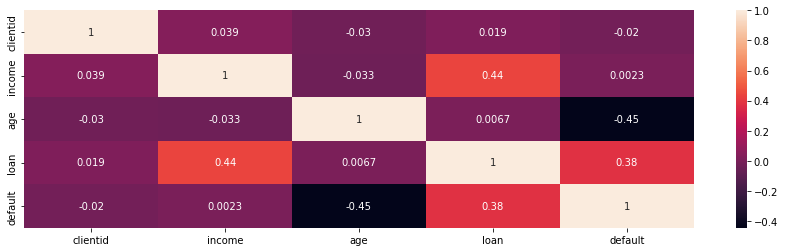

In [302]:
#Correlation heatmap
plt.figure(figsize=(15,4))  
sns.heatmap(data.corr(), annot=True)

5) X and Y

In [303]:
variaveis = ['income', 'age', 'loan']

In [304]:
X = data[variaveis]
y = data['default']

6) Model

In [305]:
model = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 0)

7) Validation

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

8) Fit Model

In [307]:
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

9) Predict

In [308]:
#The predict() method is not needed here because the model has already been trained 
#and we are just evaluating its generalizability on a test dataset.

10) Results

In [309]:
model.score(X_test, y_test)

0.985

In [311]:
data.to_excel("data_analysis.xlsx", index=False, header=True)

In [ ]:
#ata.to_csv("data_analysis.csv", sep='\t', index=False, header=True, float_format='%.2f')